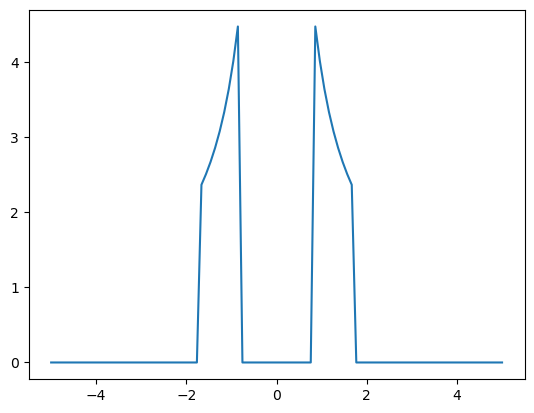

In [1]:
import matplotlib.pyplot as plt
from numpy import sinh, tanh, exp, linspace, arcsinh, log, sqrt, heaviside, abs, cosh, pi
l = 5
a = 2
x0 = 2
eps = 1
h1 = 10**(-2)
const = 0.7

ksi = lambda x: abs(x - x0) / eps
phi1 = lambda x: heaviside(1 - ksi(x), 0)
phi2 = lambda x: phi1(x) * (1 - (ksi(x))**2)
phi3 = lambda x: phi1(x) * (np.cos((pi/2) * ksi(x)))**3


def real(x, t, mu_l, phi, mu_r):
    X = a * arcsinh(sinh(1) * exp(-a * t / l))
    u01 = -(tanh(1) / tanh(x / l)) * mu_l(t + (l / a) * log(sinh(abs(x) / l) / sinh(1)))
    ch = cosh(x / l)
    zn = sqrt((sinh(x / l)) ** 2 + exp(-2 * a * t / l))
    u02 = (ch / zn) * phi(l * arcsinh(sinh(x / l) * exp(-a * t / l)))
    u03 = (tanh(1) / tanh(x / l)) * mu_r(t + (l / a) * log(sinh(abs(x) / l) / sinh(1)))
    return heaviside(-x - X, 0) * u01 + heaviside(X - abs(x), 0) * u02 + heaviside(x - X, 0) * u03

c = linspace(-5, 5, 100)
plt.plot(c, real(c, 6, phi1, phi1, phi1))
    
